In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\KUSH\Documents\train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


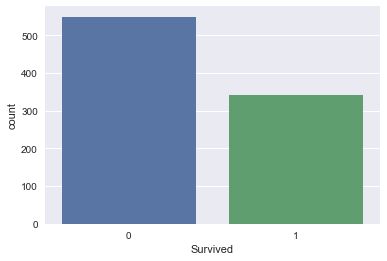

In [4]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='Survived', data=data)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.drop('Cabin', axis=1 , inplace=True)

In [7]:
data.shape

(891, 11)

In [9]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
gen=pd.get_dummies(data['Sex']).drop('male',axis=1)

In [14]:
gen.head()

,female
0,0
1,1
2,1
3,1
4,0


In [15]:
emb=pd.get_dummies(data['Embarked']).drop('S', axis=1)

In [16]:
emb.head()

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [17]:
cls=pd.get_dummies(data['Pclass']).drop([3],axis=1)
cls.head()

,1,2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [18]:
data=pd.concat([data,gen,emb,cls], axis=1)

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,C,Q,1,2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0


In [20]:
data.drop(['Pclass','Sex','Embarked','Name','Ticket','Fare'], axis=1, inplace=True)

In [22]:
data.head()

,PassengerId,Survived,Age,SibSp,Parch,female,C,Q,1,2
0,1,0,22.0,1,0,0,0,0,0,0
1,2,1,38.0,1,0,1,1,0,1,0
2,3,1,26.0,0,0,1,0,0,0,0
3,4,1,35.0,1,0,1,0,0,1,0
4,5,0,35.0,0,0,0,0,0,0,0


In [23]:
X=data.drop(['Survived'],axis=1)
Y=data['Survived']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest= train_test_split(X,Y, test_size=0.22)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log=LogisticRegression()

In [26]:
log.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
log.score(xtest,ytest)

0.7579617834394905

In [28]:
#Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
ypred=log.predict(xtest)

In [32]:
confusion_matrix(ytest,ypred)

array([[81, 17],
       [21, 38]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.7579617834394905